# Matematikai Algoritmusok és Felfedezések I.

## 8. Előadás: Numpy
### 2022 március 31.

### Tudományos csomagok (Python Scientific stack)
|   csomag |    |
| --- | --- |
| NumPy | Hatékony N-dimenziós tömb |
| SciPy | Numerikus számítások |
| Matplotlib | Grafikonok és rajzok  |
| IPython (Jupyter) | Interaktív notebook |
| SymPy | Szimbolikus számítások |
| Pandas | Adatbányászat |

# Numpy 


In [1]:
import numpy as np

## Vektorizáció

Ciklusok helyett automatikus elemenkénti műveletvégzés és optimalizálás a háttérben.

- Egyszerűbb, átlátható kód
- Gyorsabb 

In [2]:
a=np.arange(0,2000)
b=np.arange(2000,0,-1)


In [3]:
%%timeit

ans=0
for i in range(len(a)):
    ans=ans+a[i]*b[i]
ans

2.61 ms ± 599 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
%%timeit

ans=0
for x,y in zip(a,b):
    ans=ans+x*y
ans

1.81 ms ± 226 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
%%timeit

sum((x*y for x,y in zip(a,b)))


1.8 ms ± 357 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
%%timeit

np.dot(a,b)   

7.22 µs ± 944 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Copy

- `view()` : ugyanahhoz az adathoz fér hozzá és az adtok megváltoztatása az eredeti tömböt is megváltoztatja
- `copy()` : másolatot készít a tömbről, megváltoztatása nem befolyásolja az eredetit

In [7]:
a=np.arange(12).reshape(3,4)
b=a
print(b is a)

c = a.view()
print(c is a)

True
False


In [11]:
c = c.reshape((2, 6))                      # a alakja nem változik
a.shape

(3, 4)

In [12]:
c[0, 4] = 1234                      
a

array([[   0,    1,    2,    3],
       [1234,    5,    6,    7],
       [   8,    9,   10,   11]])

A `slicing` is `view`-t hoz létre. Viszont a tömbökkel indexelés nem!

In [13]:
s = a[ : , 1:3]      
s[:] = 10           
a

array([[   0,   10,   10,    3],
       [1234,   10,   10,    7],
       [   8,   10,   10,   11]])

In [14]:
e=a[[1,2]]
print(e)
e[:]=11
print(e)
a

[[1234   10   10    7]
 [   8   10   10   11]]
[[11 11 11 11]
 [11 11 11 11]]


array([[   0,   10,   10,    3],
       [1234,   10,   10,    7],
       [   8,   10,   10,   11]])

### Copy
Teljes másolat jön létre. 

In [15]:
d = a.copy()                          
print(d is a)
d[0,0] = 9999
a


False


array([[   0,   10,   10,    3],
       [1234,   10,   10,    7],
       [   8,   10,   10,   11]])

Sokszor megéri egy slicera copyt hívni, ha tömb többi részére később már nem lesz szükségünk. Így memóriát szabadíthatunk fel. 

In [16]:
a = np.arange(int(1e8))
b = a[:100].copy()
del a   # az a áltál foglalt memória felszabadul 

Ha csak `b = a[:100]` szerepelne, akkor a `del a` parancs kiadása után sem szabadulna fel a memória, hiszen `b` még hivatkozik rá.


# `np.random`
 
Numpynak van egy gazdag random számmokkal operáló alcsomagja.

A `numpy.random.rand` például  `float64` számokat randomol a [0, 1) intervallumról egyenletesen.

In [17]:
np.random.rand(2, 3, 2)

array([[[0.31035566, 0.31520522],
        [0.7441388 , 0.06492943],
        [0.13906007, 0.23912887]],

       [[0.15162081, 0.06810516],
        [0.33185582, 0.10103001],
        [0.20699772, 0.09713831]]])

Más eloszlások:

In [18]:
np.random.uniform(1, 2, (2, 2))

array([[1.9123445 , 1.73037155],
       [1.80696677, 1.77382235]])

In [19]:
np.random.standard_normal(10)

array([ 0.1656275 , -0.3690568 , -1.13564497,  2.28151832,  1.1508568 ,
       -0.03614552,  1.03213847, -0.39802381, -0.78827429,  0.45838238])

In [20]:
np.random.normal(10, 1, size=(1,10))

array([[ 9.89938875,  9.05016578,  9.56725594,  9.30157334, 10.19833188,
         9.65971944, 10.29701797, 10.49752402, 11.01587779, 10.35519784]])

Diszkrét eloszlások:

In [26]:
np.random.choice(["A", "2", "3", "4", "5", "6", "7", "8", "9",
                  "10", "J", "Q", "K"], 5, replace=True)

array(['J', '6', '3', 'K', '6'], dtype='<U2')

`choice` a valszóínűségeket is megadhatjuk:

In [30]:
np.random.choice(range(1, 7), 10,
                 p=[0.1, 0.1, 0.1, 0.1, 0.1, 0.5])

array([6, 6, 1, 4, 6, 3, 6, 6, 6, 1])

In [31]:
print(np.random.permutation(["A", "2", "3", "4", "5", "6",
                             "7", "8", "9", "10", "J", "Q", "K"]))

['K' 'Q' '4' '9' '2' '10' 'J' '5' '3' '6' '7' '8' 'A']


A `permutation` az első dimenzió szerint permutál.

In [32]:
print(np.random.permutation(np.arange(9).reshape((3, 3))))

[[3 4 5]
 [0 1 2]
 [6 7 8]]


## Lineáris algebra

`linalg` csomag:
https://numpy.org/doc/stable/reference/routines.linalg.html

A mátrix szorzásra három jelölés is létezik: 

In [11]:
A = np.array([[1, 2], [3, 4]])
A.dot(A)

array([[ 7, 10],
       [15, 22]])

In [12]:
A*A

array([[ 1,  4],
       [ 9, 16]])

In [13]:
A @ A

array([[ 7, 10],
       [15, 22]])

In [18]:
np.matmul(A,A)

array([[ 7, 10],
       [15, 22]])

Tudunk invertálni, de mint mindig, figyelni kell a kerkítési hibákra.

In [19]:
A_inv = np.linalg.inv(A)
print(A_inv)

A_inv.dot(A)

[[-2.   1. ]
 [ 1.5 -0.5]]


array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

In [20]:
np.round(A_inv.dot(A),5)

array([[1., 0.],
       [0., 1.]])

In [21]:
u = np.array([[0.0, -1.0], [1.0, 0.0]])

In [22]:
np.trace(u)  # mátrix nyoma

0.0

Lineáris egyenletrendszerek, sajátértékek

In [23]:
y = np.array([[5.], [7.]])
x=np.linalg.solve(A, y)
x

array([[-3.],
       [ 4.]])

In [24]:
A @ x

array([[5.],
       [7.]])

In [25]:
np.linalg.eig(u) 

(array([0.+1.j, 0.-1.j]),
 array([[0.70710678+0.j        , 0.70710678-0.j        ],
        [0.        -0.70710678j, 0.        +0.70710678j]]))

Kép tömörítés szingulásris érték felbontással (SVD decomposition)
=============================


## Képek közelítése alacsony rangú mátrixokkal

In [26]:
import matplotlib.pyplot as plt
import imageio                                  #kép beolvasáshoz

Legyen $A\in\mathbb{R}^{n\times m}$ egy tetszőleges mátrix. Ekkor léteznek $U\in\mathbb{R}^{n\times n}$, $D\in\mathbb{R}^{n\times m}$ és  $V\in\mathbb{R}^{m\times m}$ mátrxiok, melyekre

$$ 
A = UDV^*, 
$$ 

ahol $U$ és $V$ unitér mátrixok, tehát $U^*U = UU^* = I_n$ és $V^*V=VV^*=I_m$.  $D$ pedig diakonális mátrix, azaz $d_{ij}=0$ ha $i\ne j$. A csillag operátor konjugált transzponáltja, tehát  $(V^*)_{ij} = \overline V_{ji}$, de mivel mi valós mátrixokkal dolgozunk, elegendő transzponálásra gondolni. $D$ diagonális elemei nemnegatívak és csökkenő sorrenben jönnek: $d_{ii} = \sigma_i$, $\sigma_1\geq\sigma_2\geq\ldots\geq\sigma_r > \sigma_{r+1} = \ldots = \sigma_{\min(n,m)} = 0$, ahol $r$ az $A$ mátrix rangja. Ezeket a $\sigma$ értékeket az $A$ mátrix szinguláris értékeinek hívjuk.

#### Alacsony rangú aproximáció

Legyen $k\in\mathbb{N}$ egy természetes szám, ahol $k\leq\text{rank}(A)\leq\min\{n, m\}$. Egy olyan $A_k$ mátrixok keresünk, melyre $\text{rank}(A_k) = k$ és amelyik az $A$ mátrix legjobb közelítése a $k$ rangú mátrixok között. Tehát a következő minimalizálási feladatot szeretnénk megoldani:

$$ 
\left|\left| A - B \right|\right|_F \to \min !\qquad \mbox{ ahol }\quad B\in\mathbb{R}^{n\times m}, \ \text{rank}(B) = k. 
$$ 

Itt $\left|\left| X \right|\right|_F$ a Frobenius normát jelöli, ami az $X$ eleminek négyzetösszegének a gyöke.

A feladat megoldását mekapjuk az SVD-felbontás segítségével. Ha $A = UDV^*$, akkor megtartjuk $D$ átlójának első $k$ elemét és a többi szinguláris értéket pedig 0-ra állítjuk. Legyen $D_k$ az így kapott diagonális mátrix. Ezután újra kiszámítjuk a $UD_kV^*$ szorzatot. A nullára állított értékek miatt elég $U$ első k oszlopát és $V$ első $k$ sorát megtartani. 

Összefoglalva, az $A_k := U_kD_kV_k^*$ mátrix van legközelebb az $A$ mátrixhoz a Frobenius norma szerint a $k$ rangú mátrixok között, ahol $U_k$ és $V_k$ az első $k$ oszlopla és sora $U$-nak és $V$-nek.

In [27]:
# A rangja 2. Ha A[2,1]  értéke 4 lenne, akkor a rang csak 1 lenne.
A = np.array([[1, 2, 0, 0, 2, 3, -1, -2]]).reshape((4, 2))

print(A)

[[ 1  2]
 [ 0  0]
 [ 2  3]
 [-1 -2]]


In [28]:
n, m = A.shape
rank_A = np.linalg.matrix_rank(A)

print(f"sorok száma: {n}, oszlopok száma: {m}")
print(f"A rangja: {rank_A}")

sorok száma: 4, oszlopok száma: 2
A rangja: 2


In [29]:
U, d, V_T = np.linalg.svd(A, full_matrices=True)
print(f"szinguláris értékek: {len(d)}")

szinguláris értékek: 2


In [30]:
D = np.concatenate((np.diag(d), np.zeros((n - len(d), m))), axis=0) # szinguláris értékekből diagonális mátrix
A_restored = np.matmul(U, np.matmul(D, V_T))

A_restored = np.dot(U, np.dot(D, V_T))
A_restored = (U @ D) @ V_T

print(A_restored)

[[ 1.  2.]
 [ 0.  0.]
 [ 2.  3.]
 [-1. -2.]]


In [31]:
B = np.array([[1, 2, 0, 0, 2, 4, -1, -2]]).reshape((4, 2))
print(B)  

n, m = B.shape
rank_B = np.linalg.matrix_rank(B)

print(f"sorok száma: {n}, os zlopok száma: {m}")
print(f"B rangja: {rank_B}")

distance = np.linalg.norm(A - B, "fro")
print(f'Frobenius távolság A és B között: {distance}')

[[ 1  2]
 [ 0  0]
 [ 2  4]
 [-1 -2]]
sorok száma: 4, os zlopok száma: 2
B rangja: 1
Frobenius távolság A és B között: 1.0


In [32]:
U_1 = U[:, :1]
D_1 = D[:1, :1]
V_T_1 = V_T[:1, :]

A_1 = np.matmul(U_1, np.matmul(D_1, V_T_1))
print(f"A legjobb 1 rangú aproximációj A-nak \n {A_1}")

dist_from_A_1 = np.linalg.norm(A - A_1, "fro")
print("A Frobenius norma szerintei eltérés: {}.".format(dist_from_A_1))

A legjobb 1 rangú aproximációj A-nak 
 [[ 1.13525653  1.9200267 ]
 [ 0.          0.        ]
 [ 1.83240511  3.09909403]
 [-1.13525653 -1.9200267 ]]
A Frobenius norma szerintei eltérés: 0.2954450701681662.


### Képek közelítése
A képeket a korábban látott módon egy $n\times m\times 3$-as tömbben tároljuk. 

A fenti közelítést mindhárom színre elvégezzük.

In [33]:
import imageio
image = imageio.imread('dragon.jpg')
image

Array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [34]:
image = image / 255
row, col, _ = image.shape
print("felbontás: {} * {}".format(row, col))

felbontás: 453 * 640


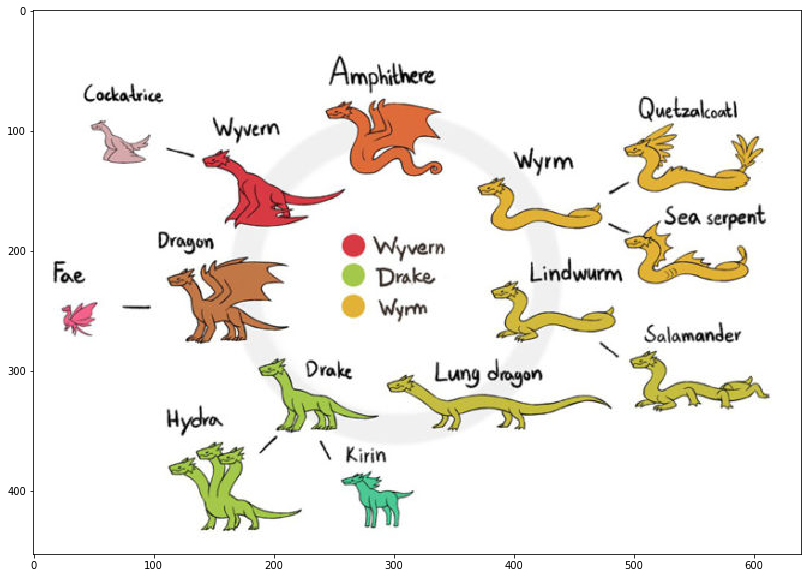

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 10))
imgplot = plt.imshow(image)
plt.show()

In [36]:
image_red = image[:, :, 0]
image_green = image[:, :, 1]
image_blue = image[:, :, 2]

In [37]:
U_r, d_r, V_r = np.linalg.svd(image_red, full_matrices=True)
U_g, d_g, V_g = np.linalg.svd(image_green, full_matrices=True)
U_b, d_b, V_b = np.linalg.svd(image_blue, full_matrices=True)

In [38]:
k = 50

U_r_k = U_r[:, :k]
V_r_k = V_r[:k, :]
U_g_k = U_g[:, :k]
V_g_k = V_g[:k, :]
U_b_k = U_b[:, :k]
V_b_k = V_b[:k, :]

d_r_k = d_r[:k]
d_g_k = d_g[:k]
d_b_k = d_b[:k]

In [39]:
image_red_approx = np.matmul(U_r_k, np.matmul(np.diag(d_r_k), V_r_k))
image_green_approx = np.matmul(U_g_k, np.matmul(np.diag(d_g_k), V_g_k))
image_blue_approx = np.matmul(U_b_k, np.matmul(np.diag(d_b_k), V_b_k))

In [40]:
image_reconstructed = np.zeros((row, col, 3))

image_reconstructed[:, :, 0] = image_red_approx
image_reconstructed[:, :, 1] = image_green_approx
image_reconstructed[:, :, 2] = image_blue_approx

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


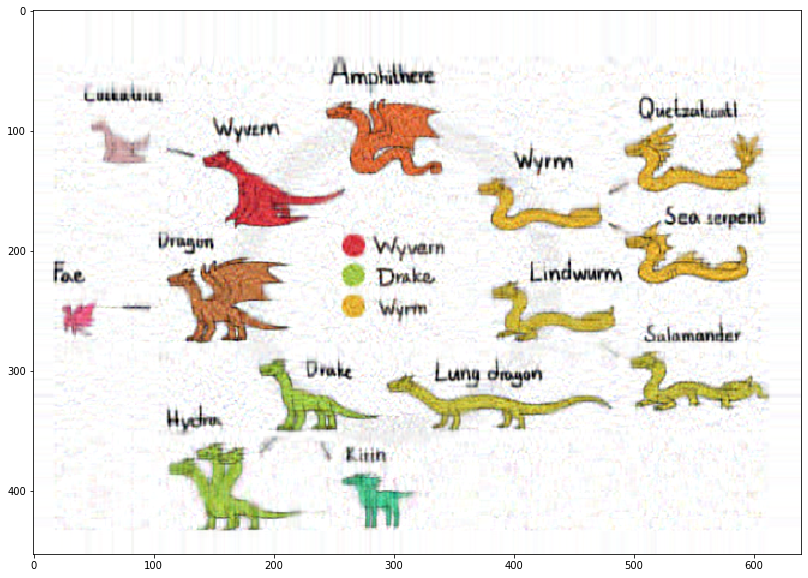

In [41]:
fig = plt.figure(figsize=(15, 10))
plt.imshow(image_reconstructed)
plt.show()

Semmi sem garantálja, hogy a közelítő mátrix értékei értelmezhetők képként. 

In [42]:

print(np.max(image_reconstructed))
print(np.min(image_reconstructed))

1.2470054437650615
-0.16842221572575905


In [43]:
image_reconstructed[image_reconstructed < 0] = 0
image_reconstructed[image_reconstructed > 1] = 1

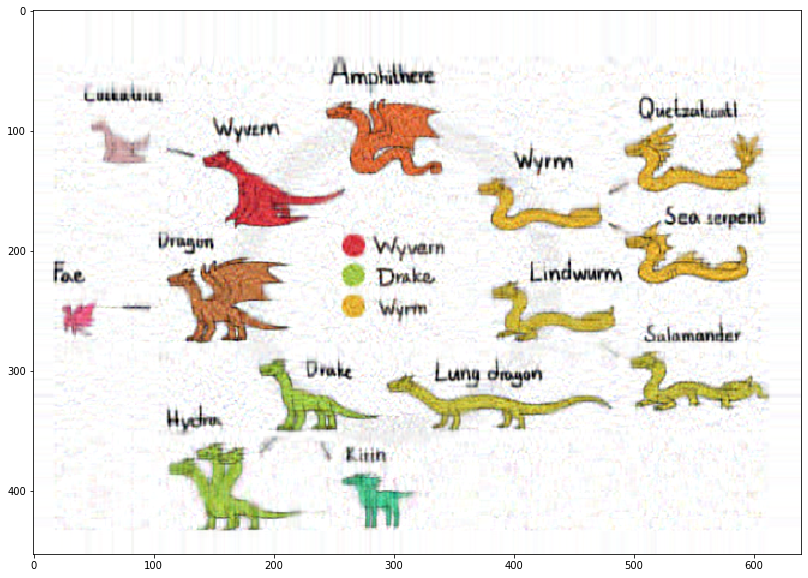

In [44]:
fig = plt.figure(figsize=(15, 10))
plt.imshow(image_reconstructed)
plt.show()

In [45]:
def compress_an_image(filename, k=50):
    image = imageio.imread(filename)
    image = image / 255
    row, col, _ = image.shape
    
    U_r, d_r, V_r = np.linalg.svd(image[:, :, 0], full_matrices=True)
    U_g, d_g, V_g = np.linalg.svd(image[:, :, 1], full_matrices=True)
    U_b, d_b, V_b = np.linalg.svd(image[:, :, 2], full_matrices=True)
    
    U_r_k = U_r[:, :k]
    V_r_k = V_r[:k, :]
    U_g_k = U_g[:, :k]
    V_g_k = V_g[:k, :]
    U_b_k = U_b[:, :k]
    V_b_k = V_b[:k, :]

    d_r_k = d_r[:k]
    d_g_k = d_g[:k]
    d_b_k = d_b[:k]

    image_red_approx = np.matmul(U_r_k, np.matmul(np.diag(d_r_k), V_r_k))
    image_green_approx = np.matmul(U_g_k, np.matmul(np.diag(d_g_k), V_g_k))
    image_blue_approx = np.matmul(U_b_k, np.matmul(np.diag(d_b_k), V_b_k))

    image_reconstructed = np.zeros((row, col, 3))
    image_reconstructed[:, :, 0] = image_red_approx
    image_reconstructed[:, :, 1] = image_green_approx
    image_reconstructed[:, :, 2] = image_blue_approx
    image_reconstructed[image_reconstructed < 0] = 0
    image_reconstructed[image_reconstructed > 1] = 1
    return image, image_reconstructed

In [47]:
image, image_compressed = compress_an_image(filename="wind.jpg", k=2)

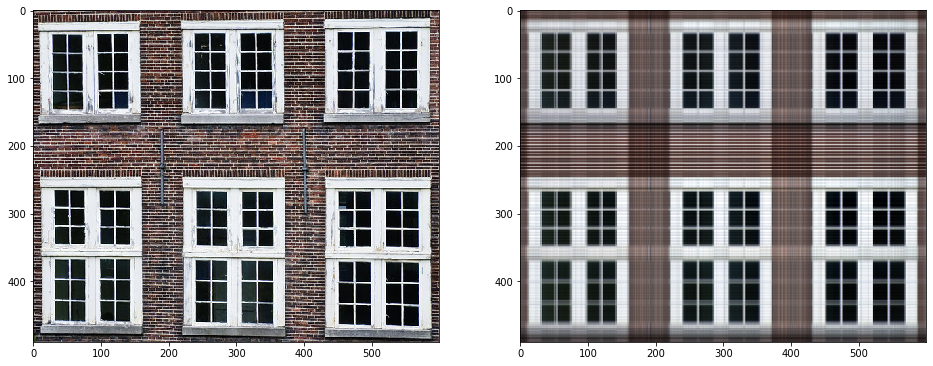

In [48]:
fig = plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(image_compressed)
plt.show()